In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

pd.set_option('display.max_columns', None)
df = pd.read_csv('./../loan_data.csv')
df.head(2)

C:\Users\Heshvi\AppData\Local\Temp\ipykernel_10512\1785418348.py:14: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./../loan_data.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
df.shape

(466285, 74)

###  Data profiling to know about data int, obj, null values etc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

### Droping some unique or unuseful values columns like id, member_id


In [4]:
df1 = df.copy()

col = ['id', 'member_id','sub_grade','url','zip_code', 'recoveries','issue_d' ]
df1.drop(columns=col, inplace=True)
df1.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,5000,5000,4975.0,36 months,10.65,162.87,B,NaN,10+ years,RENT,24000.0,Verified,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,Ryder,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,NaN,10+ years,RENT,12252.0,Not Verified,Fully Paid,n,NaN,small_business,real estate business,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,University Medical Group,1 year,RENT,80000.0,Source Verified,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop NaN columns


In [5]:
na_columns = df.columns[df.isna().any()==True].tolist()


In [6]:
df1.drop(na_columns, axis=1, inplace=True)
df1.head(4)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,RENT,Verified,Fully Paid,n,credit_card,AZ,27.65,13648,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,Source Verified,Charged Off,n,car,GA,1.00,1687,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,1.11,119.66,1,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96,84.33,C,RENT,Not Verified,Fully Paid,n,small_business,IL,8.72,2956,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,1,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49,339.31,C,RENT,Source Verified,Fully Paid,n,other,CA,20.00,5598,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48,1,INDIVIDUAL


In [7]:
df1.shape

(466285, 27)

In [8]:
#Now there is no null values
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   loan_amnt                466285 non-null  int64  
 1   funded_amnt              466285 non-null  int64  
 2   funded_amnt_inv          466285 non-null  float64
 3   term                     466285 non-null  object 
 4   int_rate                 466285 non-null  float64
 5   installment              466285 non-null  float64
 6   grade                    466285 non-null  object 
 7   home_ownership           466285 non-null  object 
 8   verification_status      466285 non-null  object 
 9   loan_status              466285 non-null  object 
 10  pymnt_plan               466285 non-null  object 
 11  purpose                  466285 non-null  object 
 12  addr_state               466285 non-null  object 
 13  dti                      466285 non-null  float64
 14  revo

In [9]:
# Findiag outliers 
# import seaborn as sns

# # Import libraries
# import matplotlib.pyplot as plt

# for i in numeric_columns:
#     plt.boxplot(df[i])
#     plt.title(i)
#     # show plot
#     plt.show()
#     sns.boxplot(data=df[[i, "loan_status"]])

In [10]:
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36 months,10.65,162.87,B,RENT,Verified,Fully Paid,n,credit_card,AZ,27.65,13648,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27,59.83,C,RENT,Source Verified,Charged Off,n,car,GA,1.00,1687,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,1.11,119.66,1,INDIVIDUAL


### Dealing with Temproable variables(Data ,time) --->term
- Replacing 36 months to 36 and 60 months to 60

In [11]:
df1['term'].unique().tolist()
df1['term'] = pd.to_numeric(df1['term'].str.replace(' months', ''))
print(df1['term'])

0         36
1         60
2         36
3         36
4         60
          ..
466280    60
466281    60
466282    60
466283    36
466284    36
Name: term, Length: 466285, dtype: int64


### Cleaning of target variable


In [12]:
df1['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [13]:
#Converting all these condition into Good/Bad or Active/Deactive into (0,1) formate 
df1['status_loan'] = np.where(df1.loc[:, 'loan_status'].isin(['Charged Off', 'Default', 'Late (16-30 days)',
                                                                       'Does not meet the credit policy. Status:Charged Off']), 0, 1)

In [14]:
#now loan_status will be droped 
df1.drop('loan_status', axis=1, inplace=True)
df1.head(2)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type,status_loan
0,5000,5000,4975.0,36,10.65,162.87,B,RENT,Verified,n,credit_card,AZ,27.65,13648,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,171.62,1,INDIVIDUAL,1
1,2500,2500,2500.0,60,15.27,59.83,C,RENT,Source Verified,n,car,GA,1.00,1687,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,1.11,119.66,1,INDIVIDUAL,0


### Numeric and categorical Columns

In [15]:
#checking how many values have are numeric and categorical
numeric_columns = [feature  for feature in df1.columns if df1[feature].dtype!='O']
categorical_columns = [feature  for feature in df1.columns if df1[feature].dtype=='O']

numeric_columns,categorical_columns

(['loan_amnt',
  'funded_amnt',
  'funded_amnt_inv',
  'term',
  'int_rate',
  'installment',
  'dti',
  'revol_bal',
  'out_prncp',
  'out_prncp_inv',
  'total_pymnt',
  'total_pymnt_inv',
  'total_rec_prncp',
  'total_rec_int',
  'total_rec_late_fee',
  'collection_recovery_fee',
  'last_pymnt_amnt',
  'policy_code',
  'status_loan'],
 ['grade',
  'home_ownership',
  'verification_status',
  'pymnt_plan',
  'purpose',
  'addr_state',
  'initial_list_status',
  'application_type'])

### filling na values with their columns average


In [16]:
df1[numeric_columns].fillna(df1[numeric_columns].mean(), inplace = True)


C:\Users\Heshvi\AppData\Local\Temp\ipykernel_10512\2249894563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[numeric_columns].fillna(df1[numeric_columns].mean(), inplace = True)


### Defining independent and dependent variable


In [17]:
X = df1.iloc[:,:-1]
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,home_ownership,verification_status,pymnt_plan,purpose,addr_state,dti,revol_bal,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,application_type
0,5000,5000,4975.0,36,10.65,162.87,B,RENT,Verified,n,credit_card,AZ,27.65,13648,f,0.00,0.00,5861.071414,5831.78,5000.00,861.07,0.00,0.00,171.62,1,INDIVIDUAL
1,2500,2500,2500.0,60,15.27,59.83,C,RENT,Source Verified,n,car,GA,1.00,1687,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,1.11,119.66,1,INDIVIDUAL
2,2400,2400,2400.0,36,15.96,84.33,C,RENT,Not Verified,n,small_business,IL,8.72,2956,f,0.00,0.00,3003.653644,3003.65,2400.00,603.65,0.00,0.00,649.91,1,INDIVIDUAL
3,10000,10000,10000.0,36,13.49,339.31,C,RENT,Source Verified,n,other,CA,20.00,5598,f,0.00,0.00,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,357.48,1,INDIVIDUAL
4,3000,3000,3000.0,60,12.69,67.79,B,RENT,Source Verified,n,other,OR,17.94,27783,f,766.90,766.90,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,67.79,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,C,MORTGAGE,Source Verified,n,debt_consolidation,TX,19.85,23208,w,12574.00,12574.00,10383.360000,10383.36,5826.00,4557.36,0.00,0.00,432.64,1,INDIVIDUAL
466281,22000,22000,22000.0,60,19.97,582.50,D,MORTGAGE,Verified,n,debt_consolidation,TN,18.45,18238,f,0.00,0.00,4677.920000,4677.92,1837.04,2840.88,0.00,0.00,17.50,1,INDIVIDUAL
466282,20700,20700,20700.0,60,16.99,514.34,D,MORTGAGE,Verified,n,debt_consolidation,OH,25.65,6688,f,14428.31,14428.31,12343.980000,12343.98,6271.69,6072.29,0.00,0.00,514.34,1,INDIVIDUAL
466283,2000,2000,2000.0,36,7.90,62.59,A,OWN,Verified,n,credit_card,CA,5.39,11404,w,0.00,0.00,2126.579838,2126.58,2000.00,126.58,0.00,0.00,1500.68,1,INDIVIDUAL


In [18]:
y = df1['status_loan']
y

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: status_loan, Length: 466285, dtype: int32

### Selecting Features in numerical features
- using ANOVA for numerical features

In [19]:
F_statistic, p_values = f_classif(df1[numeric_columns[:-1]], y.tolist())
# convert to a Dataframe
f_table_anova = pd.DataFrame(data = {'Num_col': df1[numeric_columns[:-1]].columns.values, 'f-score': F_statistic, 'p_values': p_values.round(decimals=10)})
f_table_anova.sort_values(by = ['f-score'], ascending = False, ignore_index = True, inplace = True)
f_table_anova

C:\Users\Heshvi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Heshvi\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,Num_col,f-score,p_values
0,collection_recovery_fee,53049.732668,0.000000e+00
1,total_rec_prncp,30247.739994,0.000000e+00
2,out_prncp,20343.627370,0.000000e+00
3,out_prncp_inv,20340.624259,0.000000e+00
4,total_pymnt_inv,17786.324449,0.000000e+00
5,total_pymnt,17580.263119,0.000000e+00
6,int_rate,12510.235591,0.000000e+00
7,last_pymnt_amnt,11878.507552,0.000000e+00
8,total_rec_late_fee,7059.614119,0.000000e+00
9,term,1471.830426,0.000000e+00


### Selecting Features in categorical features
- chi-squared test 

In [20]:
# chi-squared test 

chi2_check = {}

# calculate chi-statistic with the target variable
for column in categorical_columns[:-1]:
    chi, p, dof, ex = chi2_contingency(pd.crosstab(y, X[column]))
    chi2_check.setdefault('Feature',[]).append(column)
    chi2_check.setdefault('p-value',[]).append(round(p, 10))

# convert the dictionary to a DF
chi2_result = pd.DataFrame(data = chi2_check)
chi2_result.sort_values(by = ['p-value'], ascending = True, ignore_index = True, inplace = True)
chi2_result


,Feature,p-value
0,grade,0.0
1,home_ownership,0.0
2,verification_status,0.0
3,purpose,0.0
4,addr_state,0.0
5,initial_list_status,0.0
6,pymnt_plan,1.0


In [21]:
# save the top 5 numerical features in a list
cat_columns = chi2_result.iloc[:5, 0].to_list()
cat_columns

['grade', 'home_ownership', 'verification_status', 'purpose', 'addr_state']

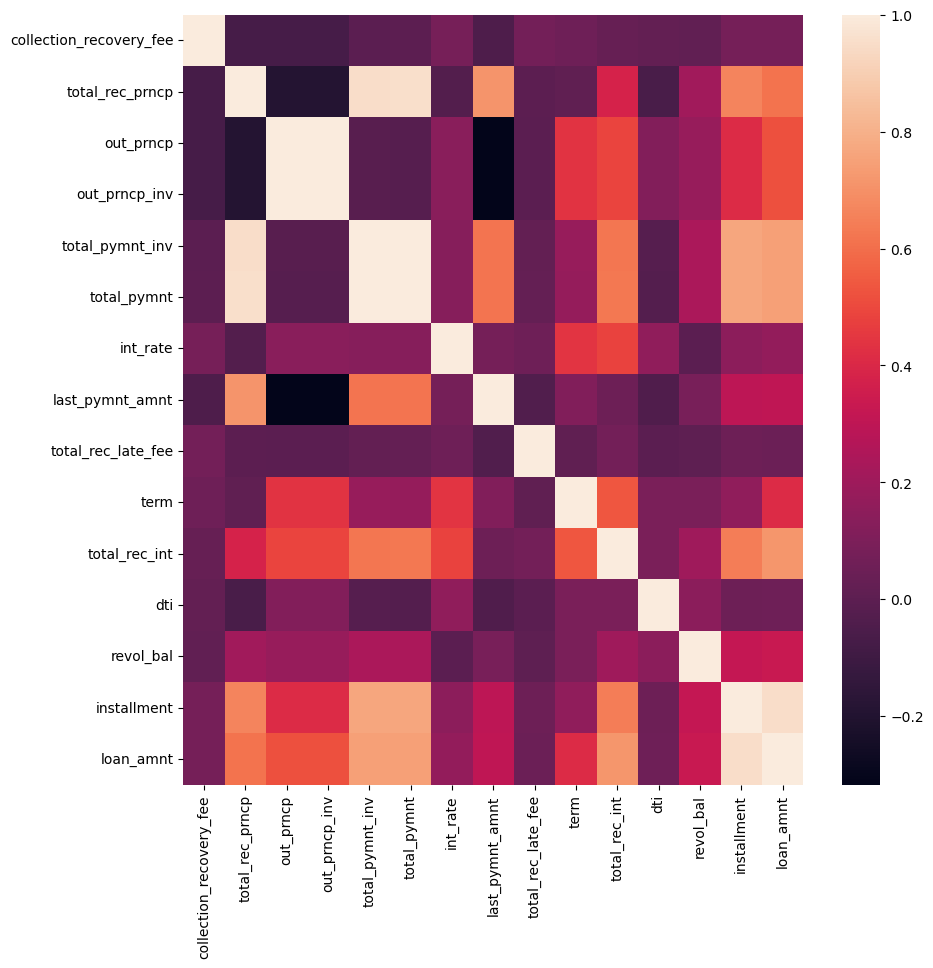

In [22]:
# save the top 15 numerical features in a list
num_features = f_table_anova.iloc[:15,0].to_list()

#Pair wise correlations to detect multicollinearity
# calculate pair-wise correlations between them
corrmat = X[num_features].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

The following features can also be safely dropped given their multicollinearity with other features:

1 out_prncp_inv

2 total_pymnt_inv

In [23]:
drop_columns_list = f_table_anova.iloc[20:, 0].to_list()
drop_columns_list.extend(chi2_result.iloc[4:, 0].to_list())
drop_columns_list.extend(['out_prncp_inv', 'total_pymnt_inv'])
X.drop(columns = drop_columns_list, inplace = True)

### One Hot encoding

In [24]:
# function to create dummy variables
def dummy_creation(df, columns_list):
    df_dummies = []
    for col in columns_list:
        df_dummies.append(pd.get_dummies(df[col], prefix = col, prefix_sep = ':'))
    df_dummies = pd.concat(df_dummies, axis = 1)
    df = pd.concat([df, df_dummies], axis = 1)
    return df
X = dummy_creation(X, ['grade', 'home_ownership', 'verification_status', 'purpose'])

In [25]:
X.drop(['grade','home_ownership', 'verification_status','purpose','application_type'], axis=1,inplace = True )

In [26]:
# Finalizing indepedent variable
X

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,dti,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
0,5000,5000,4975.0,36,10.65,162.87,27.65,13648,0.00,5861.071414,5000.00,861.07,0.00,0.00,171.62,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,2500,2500.0,60,15.27,59.83,1.00,1687,0.00,1008.710000,456.46,435.17,0.00,1.11,119.66,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400,2400,2400.0,36,15.96,84.33,8.72,2956,0.00,3003.653644,2400.00,603.65,0.00,0.00,649.91,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000,10000,10000.0,36,13.49,339.31,20.00,5598,0.00,12226.302210,10000.00,2209.33,16.97,0.00,357.48,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3000,3000,3000.0,60,12.69,67.79,17.94,27783,766.90,3242.170000,2233.10,1009.07,0.00,0.00,67.79,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466280,18400,18400,18400.0,60,14.47,432.64,19.85,23208,12574.00,10383.360000,5826.00,4557.36,0.00,0.00,432.64,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466281,22000,22000,22000.0,60,19.97,582.50,18.45,18238,0.00,4677.920000,1837.04,2840.88,0.00,0.00,17.50,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466282,20700,20700,20700.0,60,16.99,514.34,25.65,6688,14428.31,12343.980000,6271.69,6072.29,0.00,0.00,514.34,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
466283,2000,2000,2000.0,36,7.90,62.59,5.39,11404,0.00,2126.579838,2000.00,126.58,0.00,0.00,1500.68,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
# Finalizing depedent variable
y

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: status_loan, Length: 466285, dtype: int32

### Choosing Right algorithem for dataset which is logistic regression
-- Beacause Target variable is in True/false or Yes/No or Good/Bad formate

In [28]:
# Now indepedent and dependent variables are ready for spliting
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)
# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\Heshvi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
# Model Evaluation using Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 8515,   548],
       [    5, 84189]], dtype=int64)

### Heatmap

Text(0.5, 427.9555555555555, 'Predicted label')

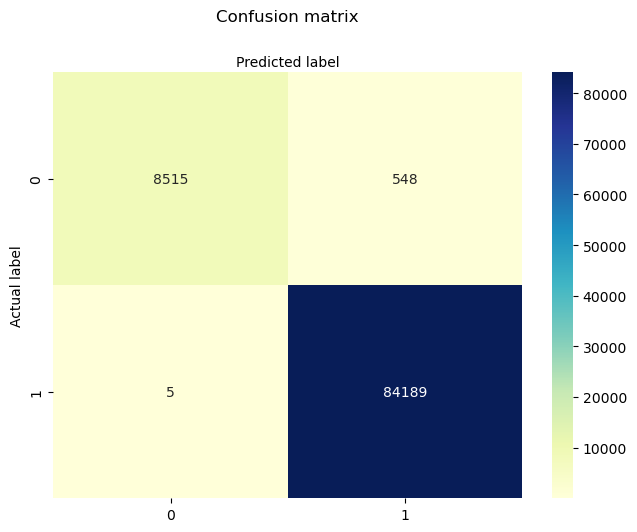

In [30]:
# Visualizing Confusion Matrix using Heatmap
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



### Classification_report


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97      9063
           1       0.99      1.00      1.00     84194

    accuracy                           0.99     93257
   macro avg       1.00      0.97      0.98     93257
weighted avg       0.99      0.99      0.99     93257



### ROC AUC Curve

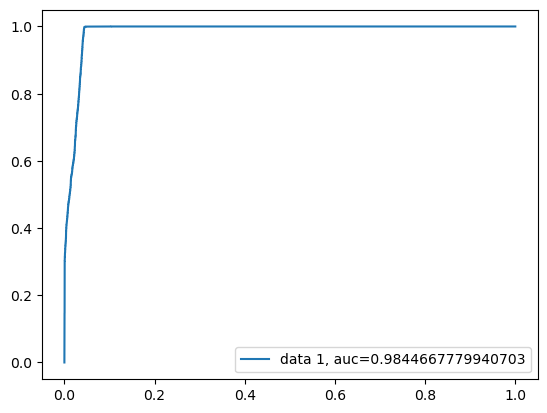

In [32]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [33]:
#Develop a data-driven credit risk model to predict the probabilities of default (PD)
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[0.0011212 , 0.9988788 ],
       [0.00985708, 0.99014292],
       [0.        , 1.        ],
       ...,
       [0.01732899, 0.98267101],
       [0.00183722, 0.99816278],
       [0.00222124, 0.99777876]])

### Accuracy Score

In [34]:

accuracy_score(y_test, y_pred)

0.9940701502300096

So Total Accuracy Score is Good which is 99%

In [35]:
# save the model to disk
import pickle
filename = 'finalized_model.sav'
pickle.dump(logreg, open(filename, 'wb'))

### Credit scores to existing or potential borrowers

In [36]:
feature_name = X_train.columns.values
# Create a summary table 
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Create a new column in the dataframe, called 'Coefficients', with row values the transposed coefficients from the 'LogisticRegression' model
summary_table['Coefficients'] = np.transpose(logreg.coef_)
# Increase the index of every row of the dataframe with 1 to store our model intercept in 1st row
summary_table.index = summary_table.index + 1
# Assign our model intercept to this new row
summary_table.loc[0] = ['Intercept', logreg.intercept_[0]]
# Sort the dataframe by index
summary_table.sort_index(inplace = True)
summary_table

,Feature name,Coefficients
0,Intercept,1.837000e-03
1,loan_amnt,-1.375191e-04
2,funded_amnt,-3.350898e-03
3,funded_amnt_inv,3.626132e-05
4,term,7.019522e-02
5,int_rate,2.591904e-02
6,installment,6.574014e-03
7,dti,2.771713e-02
8,revol_bal,2.700022e-06
9,out_prncp,3.224349e-03


In [37]:
df_scorecard = summary_table
# We reset the index of a dataframe.
df_scorecard.reset_index(inplace = True)
df_scorecard

,index,Feature name,Coefficients
0,0,Intercept,1.837000e-03
1,1,loan_amnt,-1.375191e-04
2,2,funded_amnt,-3.350898e-03
3,3,funded_amnt_inv,3.626132e-05
4,4,term,7.019522e-02
5,5,int_rate,2.591904e-02
6,6,installment,6.574014e-03
7,7,dti,2.771713e-02
8,8,revol_bal,2.700022e-06
9,9,out_prncp,3.224349e-03


In [38]:
# create a new column, called 'Original feature name', which contains the value of the 'Feature name' column, up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,Original feature name
0,0,Intercept,1.837000e-03,Intercept
1,1,loan_amnt,-1.375191e-04,loan_amnt
2,2,funded_amnt,-3.350898e-03,funded_amnt
3,3,funded_amnt_inv,3.626132e-05,funded_amnt_inv
4,4,term,7.019522e-02,term
5,5,int_rate,2.591904e-02,int_rate
6,6,installment,6.574014e-03,installment
7,7,dti,2.771713e-02,dti
8,8,revol_bal,2.700022e-06,revol_bal
9,9,out_prncp,3.224349e-03,out_prncp


In [39]:
# Define the min and max threshholds for our scorecard
min_score = 300
max_score = 850

In [40]:
# calculate the sum of the minimum coefficients of each category within the original feature name
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
# calculate the sum of the maximum coefficients of each category within the original feature name
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()
# create a new columns that has the imputed calculated Score based on the multiplication of the coefficient by the ratio of the differences between
# maximum & minimum score and maximum & minimum sum of coefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)
# update the calculated score of the Intercept (i.e. the default score for each loan)
df_scorecard.loc[0, 'Score - Calculation'] = ((df_scorecard.loc[0,'Coefficients'] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score
# round the values of the 'Score - Calculation' column and store them in a new column
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,1.837000e-03,Intercept,-25100.117721,-25100.0
1,1,loan_amnt,-1.375191e-04,loan_amnt,-24.648632,-25.0
2,2,funded_amnt,-3.350898e-03,funded_amnt,-600.607574,-601.0
3,3,funded_amnt_inv,3.626132e-05,funded_amnt_inv,6.499400,6.0
4,4,term,7.019522e-02,term,12581.638107,12582.0
5,5,int_rate,2.591904e-02,int_rate,4645.672896,4646.0
6,6,installment,6.574014e-03,installment,1178.311986,1178.0
7,7,dti,2.771713e-02,dti,4967.958066,4968.0
8,8,revol_bal,2.700022e-06,revol_bal,0.483946,0.0
9,9,out_prncp,3.224349e-03,out_prncp,577.925334,578.0


In [41]:
# check the min and max possible scores of our scorecard
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
print(min_sum_score_prel)
print(max_sum_score_prel)

298.0
848.0


In [42]:
# so both our min and max scores are out by +1. we need to manually adjust this
# Which one? We'll evaluate based on the rounding differences of the minimum category within each Original Feature Name.
pd.options.display.max_rows = 102
df_scorecard['Difference'] = df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,0,Intercept,1.837000e-03,Intercept,-25100.117721,-25100.0,0.117721
1,1,loan_amnt,-1.375191e-04,loan_amnt,-24.648632,-25.0,-0.351368
2,2,funded_amnt,-3.350898e-03,funded_amnt,-600.607574,-601.0,-0.392426
3,3,funded_amnt_inv,3.626132e-05,funded_amnt_inv,6.499400,6.0,-0.499400
4,4,term,7.019522e-02,term,12581.638107,12582.0,0.361893
5,5,int_rate,2.591904e-02,int_rate,4645.672896,4646.0,0.327104
6,6,installment,6.574014e-03,installment,1178.311986,1178.0,-0.311986
7,7,dti,2.771713e-02,dti,4967.958066,4968.0,0.041934
8,8,revol_bal,2.700022e-06,revol_bal,0.483946,0.0,-0.483946
9,9,out_prncp,3.224349e-03,out_prncp,577.925334,578.0,0.074666


In [43]:
# look like we can get by deducting 1 from the Intercept
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard.loc[0, 'Score - Final'] = 598
df_scorecard

,index,Feature name,Coefficients,Original feature name,Score - Calculation,Score - Preliminary,Difference,Score - Final
0,0,Intercept,1.837000e-03,Intercept,-25100.117721,-25100.0,0.117721,598.0
1,1,loan_amnt,-1.375191e-04,loan_amnt,-24.648632,-25.0,-0.351368,-25.0
2,2,funded_amnt,-3.350898e-03,funded_amnt,-600.607574,-601.0,-0.392426,-601.0
3,3,funded_amnt_inv,3.626132e-05,funded_amnt_inv,6.499400,6.0,-0.499400,6.0
4,4,term,7.019522e-02,term,12581.638107,12582.0,0.361893,12582.0
5,5,int_rate,2.591904e-02,int_rate,4645.672896,4646.0,0.327104,4646.0
6,6,installment,6.574014e-03,installment,1178.311986,1178.0,-0.311986,1178.0
7,7,dti,2.771713e-02,dti,4967.958066,4968.0,0.041934,4968.0
8,8,revol_bal,2.700022e-06,revol_bal,0.483946,0.0,-0.483946,0.0
9,9,out_prncp,3.224349e-03,out_prncp,577.925334,578.0,0.074666,578.0


In [44]:
# Recheck min and max possible scores
print(df_scorecard.groupby('Original feature name')['Score - Final'].min().sum())
print(df_scorecard.groupby('Original feature name')['Score - Final'].max().sum())

25996.0
26546.0


In [54]:
# Calculating credit scores for all observations in the test data set
# insert an Intercept column in its beginning to align with the # of rows in scorecard
X_test.insert(0, 'Intercept', 1)
X_test

,Intercept,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,dti,revol_bal,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,total_rec_late_fee,collection_recovery_fee,last_pymnt_amnt,policy_code,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding
26281,1,25000,25000,24950.0,36,11.49,824.29,1.60,27515,0.00,29441.21000,25000.06,4441.15,0.0,0.0,790.78,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
236473,1,15000,15000,15000.0,36,12.99,505.34,9.05,15149,10240.06,6558.60000,4759.94,1798.66,0.0,0.0,505.34,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
122766,1,29700,29700,29675.0,60,21.15,806.00,6.81,4535,0.00,37844.44681,29700.00,8144.45,0.0,0.0,24970.08,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
425049,1,6000,6000,6000.0,36,8.90,190.52,27.74,11043,0.00,6430.36000,6000.00,430.36,0.0,0.0,3001.44,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
389797,1,5000,5000,5000.0,36,7.12,154.66,30.20,6656,2354.08,3093.20000,2645.92,447.28,0.0,0.0,154.66,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57793,1,8000,8000,8000.0,36,18.55,291.44,29.41,10746,2927.04,7300.04000,5072.96,2227.08,0.0,0.0,291.44,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
149566,1,35000,35000,34975.0,36,15.80,1227.05,17.50,54681,3599.85,40471.75000,31400.16,9071.59,0.0,0.0,1227.05,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
369646,1,10000,10000,9975.0,36,9.17,318.79,8.24,3038,5064.05,6057.01000,4935.95,1121.06,0.0,0.0,318.79,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
49623,1,21000,21000,21000.0,36,13.98,717.53,34.38,3637,7992.18,17220.68000,13007.82,4212.86,0.0,0.0,717.53,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# get the list of our final scorecard scores
scorecard_scores = df_scorecard['Score - Final']
# check the shapes of test set and scorecard before doing matrix dot multiplication
print(X_test.shape)
print(scorecard_scores.shape)

(93257, 47)
(47,)


In [58]:
# we can see that the test set has 17 less columns than the rows in scorecard due to the reference categories
# since the reference categories will always be scored as 0 based on the scorecard, it is safe to add these categories to the end of test set with 0 values
# X_test = pd.concat([X_test, pd.DataFrame(dict.fromkeys(X_train.columns.values, [0] * len(X_test)), 
#                                                                          index = X_test.index)], axis = 1)
# # Need to reshape scorecard_scores so that it is (102,1) to allow for matrix dot multiplication
scorecard_scores = scorecard_scores.values.reshape(47, 1)
print(X_test.shape)
print(scorecard_scores.shape)

(93257, 47)
(47, 1)


In [59]:
# matrix dot multiplication of test set with scorecard scores
y_scores = X_test.dot(scorecard_scores)
y_scores.head()

,0
26281,1.149304e+06
236473,7.960523e+05
122766,1.362445e+07
425049,2.250503e+06
389797,7.224638e+05
